<h1>Jugemos con los números primos y su factorización </h1>
<p> Primero veamos una herramienta que nos dice si es un número primo o no 

In [1]:
import math
import collections

import time
import random
import numpy as np  

import matplotlib.pyplot as plt
import numpy as np 

def isPrime(n):
    if n % 2 == 0:
        return False
    if  0 in [ (n % i) for i in range(3,int(math.sqrt(n))+1,2)]:
        return False
    return True

print ([(i,isPrime(i)) for i in range(6,20)])

[(6, False), (7, True), (8, False), (9, False), (10, False), (11, True), (12, False), (13, True), (14, False), (15, False), (16, False), (17, True), (18, False), (19, True)]


<h3>Algoritmo para hallar los factores primos de un número</h3>
El algoritmo es sencillo:
<ol>
<li>Busca 2 como divisor, tantas veces como sea posible, dividiendo por 2 el número aportado</li>
<li>Busca, impares de 3... hasta sqrt(n) y divide si la division es entera</li>
<li>Si queda algo por encima de la raíz de n es que este es un número primo que divide  n</li>
</ol>
<p>Utilizamos el subtipo de diccionario <strong>Counter</strong> para acumular los factores y su multiplicidad

In [5]:
def primeFactors(n):
    primes = collections.Counter()

    #[1]# Print the number of 2s that divide n
    while n % 2 == 0:
        primes['2'] += 1
        n = n//2
    

    #[2]# Check for divisors up to sqrt(n)
    for i in range(3,int(math.sqrt(n))+1,2):
        #While i divides n, print i and divide n
        while (n % i == 0):
            primes[str(i)] += 1
            n = n//i   

    # This condition is to handle the case when n
    #[3]# is a prime number greater than 2
    if (n > 2):
        primes[str(n)] +=1
        
    return primes

print (f"Prime factors de {1000137} is {primeFactors(1000137)}")

Prime factors de 1000137 is Counter({'3': 1, '43': 1, '7753': 1})


### Analicemos la complejidad del algoritmo anterior
Vemos que no es una algoritmo recursivo...  
* El punto <strong>[0] es </strong> del orden de, en el peor de los casos  $ \Omicron(log_2(n))$  
* El punto <strong>[1] es </strong> del orden de, en el peor de los casos  $ \Omicron({1/2}\sqrt{n})$  
* Finalmente, el punto   <strong>[2] </strong> es $ \Omicron(1)$

De todos ellos, el factor dominante es el <strong>[1]</strong> y por tanto el algoritmo escala $ \backsim \sqrt{n} $ eliminando las constantes.

Para medirlo, vamos a generar números aleatorios, de órdenes de magnitud creciente, y vamos a medir tiempos.  
Como en cada caso éste puede variar, tomaremos medias de varias repeticiones. Como orden de magnitud, tomaremos  
en número de dígitos de un numero entero

Necesitamos un generador aleatorio  de longitud predefinida:-


In [12]:
def randomDigitLength(n):
    val = 0 
    for _ in range(n):
        val = val*10 + random.randint(0,9)
    return val

print (f"Número aleatorio de 35 dígitos: {randomDigitLength(35)}")

Número aleatorio de 35 dígitos: 36655385524864802659424321444717018


<h3>Midamos tiempos </h3> 

In [33]:

def measurePrimeFactors(maxDigits, repeatTimes):
    # devuelve el número de digitos, el tiempo medio de factorización, (us), y la desviación standard, 
    # ejecutando 
    digits= []
    times = []
    stds = []

    for n in range(3,maxDigits+1):
        
        iter_times = []
        for _ in range(repeatTimes): 
            t0 = time.process_time_ns()
            primeFactors(randomDigitLength(n))       
            t1 = (time.process_time_ns() - t0)/(1E3*repeatTimes)
            iter_times.append(t1)
    
        digits.append(n)
        times.append(np.mean(iter_times))
        stds.append(np.std(iter_times))
        
    return digits,times,stds

In [46]:
n_vec, times, stds = measurePrimeFactors(17,2)
print ( f"{' N':10s} {'Time':10s} {'std':10s}" )    
for n, t, std in zip(n_vec,times,stds):
    print ( f"{n:2d}, {t:10.2f} us, {std:10.2f} us" )    

 N         Time       std       
 3,      18.12 us,       7.69 us
 4,      14.26 us,       2.25 us
 5,      16.68 us,       1.57 us
 6,      31.26 us,       0.85 us
 7,      52.22 us,       8.71 us
 8,     151.46 us,      40.95 us
 9,     792.35 us,      70.61 us
10,    1704.34 us,     254.75 us
11,    4805.52 us,     630.21 us
12,   16720.13 us,    7016.43 us
13,   65955.79 us,   34442.39 us
14,   72885.04 us,   19506.46 us
15,  298781.77 us,   27612.39 us
16, 1563605.94 us,   60003.80 us
17, 4635212.47 us, 1530676.13 us


<h3>Veamos gráficamente </h3>
En ejes normales ( para cada longitud, tomamos un valor central) y logaritmicos ( base 10)

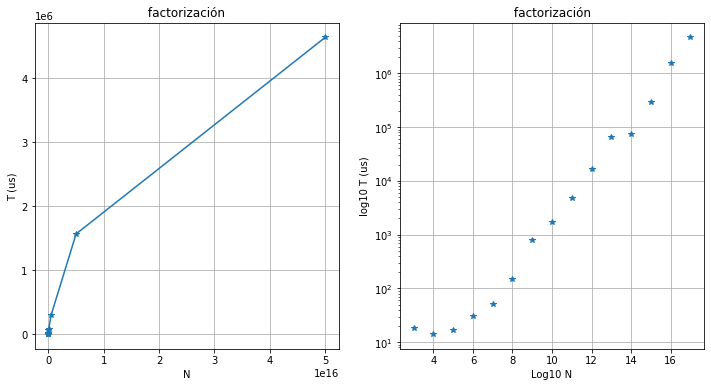

In [52]:
fig, axes = plt.subplots(1,2,figsize=(12,6))
digits = [ 0.5*(10**n) for n in n_vec]
axes[0].plot(digits, times,'*-')
axes[0].set(xlabel='N',  ylabel='T (us)',  title=f' factorización ')
axes[0].grid()

axes[1].plot(n_vec, times,'*')
axes[1].set(xlabel='Log10 N',  ylabel='log10 T (us)',  title=f' factorización ')
axes[1].set_yscale('log', base=10)
axes[1].grid()

plt.show()

### Fitting del modelos 
Si, como hemos visto, el tiempo de ejecución es  $ \Omicron (\sqrt{n} $ ), si tomamos logaritmos en base 10,  
se puede ver que el tiempo logaritmo del tiempo de ejeución es approximadamente lineal con el logaritmo del 
número n. Esto es:

$\hspace{2cm} \log_{10}N \backsim c\times \log_{10} n $

donde $c$ es la potencia, que esperamos sea proxima a $0,5$.  

Para ello, utilizamos una simple función de ajuste polinómico proporcionado en al librería numpy de Python,  

$\hspace{2cm} \tt{fit = numpy.polyfit(x,y,nDeg)}$  y la función de evaluación  $ \tt {numpy.poly1d(fit)}$

Con ello, obviando los dos primeros puntos...

c = 0.462


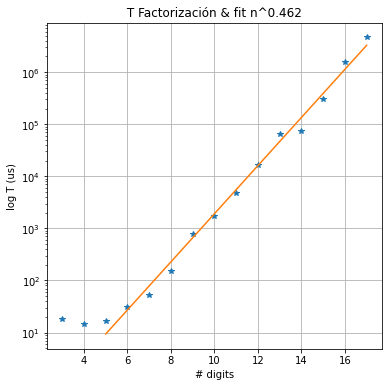

In [60]:
logt = [ math.log10(t) for t in times[2:]]
fit = np.polyfit(n_vec[2:],logt,1)
print (f"c = {fit[0]:.3f}")
fit_log = np.poly1d(fit)
t_fit = [ 10**(fit_log(val)) for val in n_vec[2:]]

fig, axes = plt.subplots(1,1,figsize=(6,6))
axes.plot(n_vec, times,'*')
axes.plot(n_vec[2:], t_fit)
axes.set(xlabel='# digits',  ylabel='log T (us)',  title=f' T Factorización & fit n^{fit[0]:.3f} ')
axes.set_yscale('log', base=10)
#axes.set_xscale('log')
axes.grid()
plt.show()


### Conclusión
el tiempo de facturación escala de forma muy cercana a $ \Omicron(\sqrt{n})$, the hecho, la medición va como $ \Omicron({n}^{0.47})$.

### Bonus track 
Existen mucho mejores implementaciones de la factorización de números. Ved la librería primefac en python y, compara estos tiempos con los ofrecidos por ésta.